In [3]:
import pandas as pd
import pandas
import matplotlib.pyplot as plt
import zipfile
import warnings
import math
import plotly
import plotly.plotly as py
import numpy as np
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly import tools
import matplotlib as mpl
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

In [4]:
#Unzipping the refugee file
zipfile.ZipFile('refugee-data.zip').extractall('.')

In [5]:
#Filtering warnings to ignore
warnings.filterwarnings("ignore")

In [6]:
#Reading in all the csv files from the zipped folder
resettlement=pandas.read_csv("resettlement.csv")
df =pandas.read_csv("asylum_seekers.csv",  header=0)
asylum_sm =pandas.read_csv("asylum_seekers_monthly.csv")
demographics =pandas.read_csv("demographics.csv")
df3 =pandas.read_csv("persons_of_concern.csv")
time =pandas.read_csv("time_series.csv")

In [7]:
df.columns

Index(['Year', 'Country / territory of asylum/residence', 'Origin',
       'RSD procedure type / level', 'Tota pending start-year',
       'of which UNHCR-assisted(start-year)', 'Applied during year',
       'decisions_recognized', 'decisions_other', 'Rejected',
       'Otherwise closed', 'Total decisions', 'Total pending end-year',
       'of which UNHCR-assisted(end-year)'],
      dtype='object')

In [32]:
#Checking for empty rows
resettlement.isnull().values.any()

False

In [33]:
df.isnull().values.any()

True

In [34]:
#Removing empty rows and rechecking 
df = df.dropna(axis = 0)
df.isnull().values.any()

False

In [35]:
asylum_sm = assylum_sm.dropna(axis = 0)

In [36]:
demographics = demographics.dropna(axis = 0)
demographics.isnull().values.any()

False

In [37]:
df3=df3.dropna(axis = 0)
df3.isnull().values.any()

False

In [38]:
time=time.dropna(axis = 0)
time.isnull().values.any()

False

In [39]:
asylum_sm.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7


In [40]:
#Assessing the data types for each column
asylum_sm.dtypes

Country / territory of asylum/residence    object
Origin                                     object
Year                                        int64
Month                                      object
Value                                      object
dtype: object

In [41]:
#Deriving the basic information on the dataset
asylum_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332189 entries, 0 to 332188
Data columns (total 5 columns):
Country / territory of asylum/residence    332189 non-null object
Origin                                     332189 non-null object
Year                                       332189 non-null int64
Month                                      332189 non-null object
Value                                      332189 non-null object
dtypes: int64(1), object(4)
memory usage: 15.2+ MB


In [42]:
df1 = pd.DataFrame(assylum_sm,columns=['Origin','Value'])
df1.head()

,Origin,Value
0,Afghanistan,8
1,Afghanistan,10
2,Afghanistan,25
3,Afghanistan,25
4,Afghanistan,7


In [43]:
#Fill in the rows with * with 0 and converting the value column to numeric in order to find the sum
df1['Value']=pd.to_numeric(df1.Value, errors="coerce").fillna(0).astype(int)

In [44]:
#Rechecking the datatype for Value
df1.dtypes

Origin    object
Value      int32
dtype: object

In [45]:
#Finding the sum of Refugees from 1999-2016 based on the country of origin
df2=df1.groupby(by=['Origin']).sum()
df3=df2.sort_values("Value", ascending=False).head(15)
df4 = df3.reset_index()
df4

,Origin,Value
0,Syrian Arab Rep.,1027453
1,Afghanistan,952542
2,Iraq,900244
3,Serbia and Kosovo: S/RES/1244 (1999),632975
4,China,421080
5,Russian Federation,398960
6,Iran (Islamic Rep. of),374002
7,Pakistan,342790
8,Somalia,303382
9,Nigeria,285764


In [48]:
#Converting the Countries to their equivalent codes to plot on plotly
CODE = {
    'Syrian Arab Rep.' : 'SYR','Afghanistan': 'AFG', 'Iraq': 'IRQ', 'Serbia and Kosovo: S/RES/1244 (1999)':'SRB',
    'China':'CHN', 'Russian Federation' : 'RUS','Iran (Islamic Rep. of)': 'IRN','Pakistan':'PAK', 'Somalia':'SOM',
    'Nigeria':'NGA', 'Eritrea' :'ERI','Turkey':'TUR','Mexico':'MEX','Albania':'ALB', 'Sri Lanka':'LKA'
    }

In [49]:
#Assigning the above mentioned code as a column to each Country
df4['CODE'] = df4['Origin'].apply(lambda x : CODE[x])
df4

,Origin,Value,CODE
0,Syrian Arab Rep.,1027453,SYR
1,Afghanistan,952542,AFG
2,Iraq,900244,IRQ
3,Serbia and Kosovo: S/RES/1244 (1999),632975,SRB
4,China,421080,CHN
5,Russian Federation,398960,RUS
6,Iran (Islamic Rep. of),374002,IRN
7,Pakistan,342790,PAK
8,Somalia,303382,SOM
9,Nigeria,285764,NGA


In [50]:
#World Map(Using Plotly) showing the top 15 countries with the hishest numbe rof refugees based on their Country of Origin
scl =  [0, "rgb(5, 10, 172)"],
[0.35, "rgb(40, 60, 190)"],
[0.5, "rgb(70, 100, 245)"],
[0.6, "rgb(90, 120, 245)"],
[0.7, "rgb(106, 137, 247)"],
[1, "rgb(220, 220, 220)"],

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df4['CODE'],
        z = df4['Value'],
        text = df4['Origin'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Refugees")
        ) ]

layout = dict(
        title = 'Refugees based on their Country of Origin',
        geo = dict(
            scope='world',
            projection=dict( type='robinson' ),
            showlakes = False))
    
fig = dict( data=data, layout=layout )
iplot( fig )

In [51]:
df7 = pd.DataFrame(assylum_sm,columns=['Year', 'Value',])
df7.head()

,Year,Value
0,1999,8
1,1999,10
2,1999,25
3,1999,25
4,1999,7


In [52]:
Ref = pd.DataFrame(assylum_sm,columns=['Year','Value'])
Ref.head()

,Year,Value
0,1999,8
1,1999,10
2,1999,25
3,1999,25
4,1999,7


In [53]:
Ref['Value']=pd.to_numeric(Ref.Value, errors="coerce").fillna(0)

In [54]:
#Trend in Refugees over the years
Ref=Ref.groupby(by=['Year']).sum()
Ref=Ref.reset_index()

In [55]:
#Dropping the year 2016 and 2017 as the data stops in the month of May
Ref = Ref.drop(Ref[Ref.Year > 2015].index)
Ref.tail()

,Year,Value
12,2011,432473.0
13,2012,475645.0
14,2013,580799.0
15,2014,834773.0
16,2015,1646296.0


In [56]:
#Using plotly to plot the Trend in Refugees between 1999-2015
Plot = []

Plot.append(go.Scatter(x = Ref.Year,y= Ref.Value))

layout = go.Layout(dict(title= "Trend in Refugees between 1999-2016",xaxis=dict(title="Years"),
                        yaxis=dict(title="Number of applications")))
Lineplot = go.Figure(Plot,layout)    
iplot(Lineplot)    

In [57]:
#Shortlisting the columns to Origin, Year and Value and making Origin the index column
Spec=assylum_sm.loc[:, ['Origin','Year', 'Value']]
Spec.head()

,Origin,Year,Value
0,Afghanistan,1999,8
1,Afghanistan,1999,10
2,Afghanistan,1999,25
3,Afghanistan,1999,25
4,Afghanistan,1999,7


In [58]:
Spec = Spec.drop(Spec[Spec.Year > 2015].index)

In [59]:
Spec1=Spec.set_index('Origin')
Spec1.tail()

,Year,Value
Origin,,
Zimbabwe,2015,12
Zimbabwe,2015,9
Zimbabwe,2015,6
Zimbabwe,2015,9
Zimbabwe,2015,14


In [60]:
Spec1['Value']=pd.to_numeric(Spec1.Value, errors="coerce").fillna(0).astype(int)
Spec1.dtypes

Year     int64
Value    int32
dtype: object

In [61]:
Spec21= Spec1.loc[["Afghanistan","Iraq","Syrian Arab Rep."]]
Spec22=Spec21.groupby(by=['Origin'])['Value'].sum()
Spec22

Origin
Afghanistan         695810
Iraq                716940
Syrian Arab Rep.    674542
Name: Value, dtype: int32

In [62]:
#Using Plotly to find the percentage difference between the top 3 refugee-seeking countries(BASED ON THE WORLD MAP)
labels = ['Afghanistan','Iraq','Syria']
values = [952542,900244,1027453]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])

In [63]:
Spec2= Spec1.loc[["Afghanistan"]]
Spec3=Spec1.loc[["Syrian Arab Rep."]]

In [64]:
Spectot=Spec2.groupby(by=['Year']).sum()
Spectot.reset_index()

,Year,Value
0,1999,25053
1,2000,31609
2,2001,53203
3,2002,26498
4,2003,14308
5,2004,9199
6,2005,8106
7,2006,8653
8,2007,9293
9,2008,18436


In [65]:
#Yearly concentration for Syria
Spectot1=Spec3.groupby(by=['Year']).sum()
Spectot1.reset_index()

,Year,Value
0,1999,4394
1,2000,5189
2,2001,4558
3,2002,3802
4,2003,3484
5,2004,3352
6,2005,4115
7,2006,3704
8,2007,5503
9,2008,4823


In [66]:
Spectot['Syria']=Spectot1['Value']
Spectot.rename(columns={"Value": "Afghanistan"}, inplace=True)
Spectot.head()

,Afghanistan,Syria
Year,,
1999,25053,4394
2000,31609,5189
2001,53203,4558
2002,26498,3802
2003,14308,3484


Text(0.5, 0, 'Years')

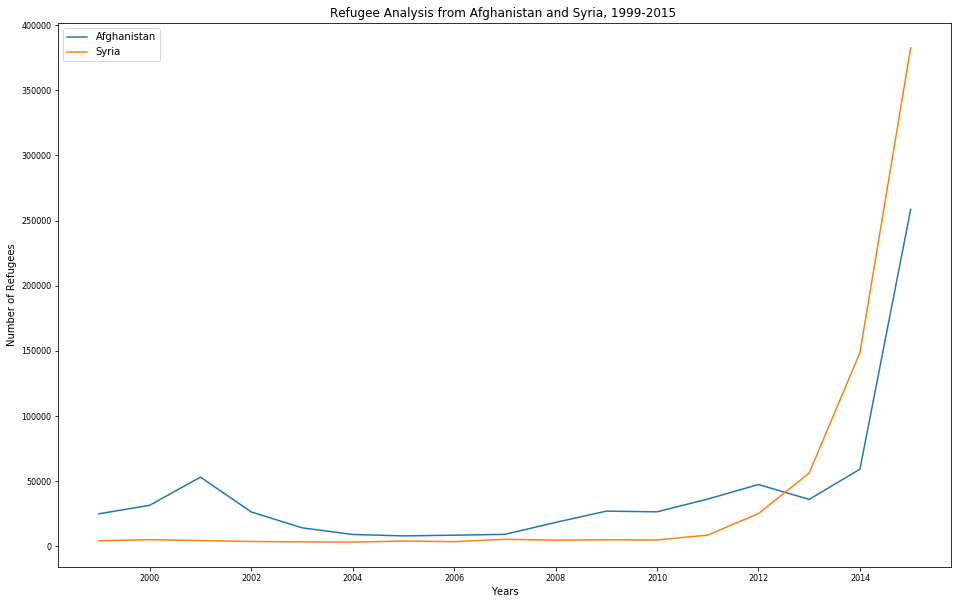

In [67]:
Syria=Spectot.plot(kind='line',figsize=(16,10), legend=True, fontsize=8)
plt.title('Refugee Analysis from Afghanistan and Syria, 1999-2015 ')
plt.ylabel('Number of Refugees')
plt.xlabel('Years')

In [68]:
#Resettlement of Refugees
resettlement.head()

,Country / territory of asylum/residence,Origin,Year,Value
0,Canada,Albania,1959,17
1,Canada,Austria,1959,17
2,Canada,Belgium,1959,2
3,Canada,Bulgaria,1959,35
4,Canada,China,1959,2


In [173]:
#Deleting the column 'Origin'
Res=resettlement.drop('Origin', axis=1)
Res.head()

,Country / territory of asylum/residence,Year,Value
0,Canada,1959,17
1,Canada,1959,17
2,Canada,1959,2
3,Canada,1959,35
4,Canada,1959,2


In [70]:
#Renaming columns
Res.rename(columns={'Country / territory of asylum/residence': 'Country of Asylum'}, inplace=True)
Res.columns

Index(['Country of Asylum', 'Year', 'Value'], dtype='object')

In [71]:
Res.dtypes

Country of Asylum    object
Year                  int64
Value                object
dtype: object

In [72]:
#Converting Value to int from object and filling empty rows
Res['Value']=pd.to_numeric(Res.Value, errors="coerce").fillna(0).astype(int)

In [1]:
#Made 2011 the starting as data goes back to 1959
Res1 = Res.drop(Res[Res.Year < 2011].index)

In [172]:
Res2=Res1.drop('Year', axis=1)

In [75]:
Reset=Res2.groupby(by=['Country of Asylum']).sum()
Resett=Reset.sort_values("Value", ascending=False).head(15)
Resettl = Resett.reset_index()
Resettl

,Country of Asylum,Value
0,United States of America,420347
1,Canada,113659
2,Australia,76849
3,Sweden,11408
4,Norway,10380
5,United Kingdom of Great Britain and Northern I...,10287
6,Finland,5018
7,New Zealand,4008
8,Netherlands,2753
9,Denmark,2746


In [76]:
#Converting the Countries to their equivalent codes to plot on plotly
CODE = {
'United States of America':'USA','Canada':'CAN','Australia':'AUS','Sweden':'SWE','Norway':'NOR',
'United Kingdom of Great Britain and Northern Ireland':'GBR','Finland':'FIN','New Zealand':'NZL','Netherlands':'NLD',
'Denmark':'DNK','Germany':'DEU','France':'FRA','Switzerland':'CHE','Austria':'AUT','Belgium':'BEL'}

In [77]:
#Assigning the above mentioned code as a column to each Country
Resettl['CODE'] = Resettl['Country of Asylum'].apply(lambda x : CODE[x])
Resettl

,Country of Asylum,Value,CODE
0,United States of America,420347,USA
1,Canada,113659,CAN
2,Australia,76849,AUS
3,Sweden,11408,SWE
4,Norway,10380,NOR
5,United Kingdom of Great Britain and Northern I...,10287,GBR
6,Finland,5018,FIN
7,New Zealand,4008,NZL
8,Netherlands,2753,NLD
9,Denmark,2746,DNK


In [78]:
#World Map(Using Plotly) showing the top 15 countries with the hishest number of refugees based on their Country of Asylum
scl =  [0.2, "rgb(7, 13, 162)"],[0.15, "rgb(30, 50, 180)"],[0.7, "rgb(750, 90, 145)"],[0.8, "rgb(90, 140, 345)"],
[0.8, "rgb(126, 127, 237)"],[2, "rgb(230, 230, 230)"]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = Resettl['CODE'],
        z = Resettl['Value'],
        text = Resettl['Country of Asylum'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Refugees")
        ) ]

layout = dict(
        title = 'Refugees based on their Country of Asylum',
        geo = dict(
            scope='world',
            projection=dict( type='equirectangular' ),
            showlakes = False))
    
fig = dict( data=data, layout=layout )
iplot( fig )

In [79]:
dff = df['Origin'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Country of Origin'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [80]:
dff = df['Country / territory of asylum/residence'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Country of Asylum'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [81]:
df3 = pd.read_csv("persons_of_concern.csv")

In [82]:
dff = df3.Year.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['Year', 'Refugees (incl. refugee-like situations)']

trace = go.Bar(
    x=dff.Year,
    y=dff['Refugees (incl. refugee-like situations)'],
    marker=dict(
        color = dff.Year,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='#Refugees yearly', 
    yaxis = dict(title = '# refugees'
                                                )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [83]:
dff = df3['Country / territory of asylum/residence'].value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['Total Population', 'Country / territory of asylum/residence']
#month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
           # 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#dff.month = dff.month.map(month)
dff.columns
trace = go.Bar(
    x=dff['Total Population'],
    y=dff['Country / territory of asylum/residence'],
    marker=dict(
        color = dff['Country / territory of asylum/residence'],
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='#Refugees population by country', 
    yaxis = dict(title = '# refugees'
                                                )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [84]:
df_new= df3.drop(df[df.Year == 2017].index)
df_new.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,Switzerland,Various/Unknown,10000,NaN,NaN,NaN,NaN,NaN,NaN,10000


In [233]:
df=df.rename(index=str, columns={"Country / territory of asylum/residence": "Country", "Applied during year": "Applied"})


In [154]:
df.dtypes

Year                                    int64
Country                                object
Origin                                 object
RSD procedure type / level             object
Tota pending start-year                object
of which UNHCR-assisted(start-year)    object
Applied                                object
decisions_recognized                   object
decisions_other                        object
Rejected                               object
Otherwise closed                       object
Total decisions                        object
Total pending end-year                 object
of which UNHCR-assisted(end-year)      object
dtype: object

In [155]:
df_new['Population']=pd.to_numeric(df_new.Population, errors="coerce").fillna(0).astype(int)

In [229]:
dff = df_new.groupby('Country').Population.sum().to_frame().sort_values(by='Population',
                                                    ascending=False)[:12].round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.Population,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.Population.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Territory of asylum residence ', 
                   
                   yaxis = dict(title = 'Population')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [234]:
df['Applied']=pd.to_numeric(df.Applied, errors="coerce").fillna(0).astype(int)
df['Rejected']= pd.to_numeric(df.Rejected, errors="coerce").fillna(0).astype(int)

In [238]:
dff = df.groupby('Origin').Applied.sum().to_frame().sort_values(by='Applied',
                                                    ascending=False)[:12].round(2)
    y=df.Applied,
    name='Applied',
    marker=dict(
        color = 'navy'
    )
)

dff = df.groupby('Origin').Rejected.sum().to_frame().sort_values(by='Rejected',
                                                    ascending=False)[:12].round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.Rejected,
    name='Rejected',
    marker=dict(
        color = 'red'
    )
)


data = [trace1,trace2]
layout = go.Layout(
    title='', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [160]:
dff = df.groupby('Origin')[['Rejected']].mean().sort_values(by='Rejected', 
                                                    ascending=False)[:12].round(3)

trace1 = go.Scatter(
    x=dff.index,
    y=dff.Rejected,
    mode='markers',
    marker=dict(
        symbol = 'star-square',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.Rejected,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Rejection Rate by Country', yaxis = dict(title = 'Rejection Rate'
                                                       )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

dff = df.groupby('Year')[['Rejected']].mean().sort_values(by='Rejected', 
                                            ascending=False)[:12].round(3)
trace2 = go.Scatter(
    x=dff.index,
    y=dff.Rejected,
    mode='markers',
    marker=dict(symbol = 'diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.Rejected,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Rejection Rate by Year', 
                   yaxis = dict(title = 'Rejection Rate'
                                                     )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [94]:
terror=pandas.read_csv("globalterror.csv")

In [95]:
terror.rename(columns={"country_txt":"Country", "attacktype1_txt":"Attack","iyear":"year"}, inplace=True)
terror.head()

,eventid,year,imonth,iday,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [96]:
Terror=terror.loc[:, ['Country','year', 'Attack']]
Terror.head()

,Country,year,Attack
0,Dominican Republic,1970,Assassination
1,Mexico,1970,Hostage Taking (Kidnapping)
2,Philippines,1970,Assassination
3,Greece,1970,Bombing/Explosion
4,Japan,1970,Facility/Infrastructure Attack


In [97]:
Terror['Total'] = 1
Terror.head()

,Country,year,Attack,Total
0,Dominican Republic,1970,Assassination,1
1,Mexico,1970,Hostage Taking (Kidnapping),1
2,Philippines,1970,Assassination,1
3,Greece,1970,Bombing/Explosion,1
4,Japan,1970,Facility/Infrastructure Attack,1


In [98]:
Terror2= Terror.drop(Terror[Terror.year < 2008].index)
Terror3= Terror2.drop(Terror[Terror.year > 2011].index)
Terror3.tail()

,Country,year,Attack,Total
104649,Iraq,2011,Armed Assault,1
104650,Pakistan,2011,Bombing/Explosion,1
104651,Iraq,2011,Bombing/Explosion,1
104652,Pakistan,2011,Bombing/Explosion,1
104653,Pakistan,2011,Bombing/Explosion,1


In [115]:
Terror4=Terror3.set_index("Country")

In [129]:
Terror5=Terror4.loc[['Iraq']]
Terror6=Terror5.reset_index()
Terror7=Terror6.groupby(['year', 'Country']).sum()
Terror7.reset_index()

,year,Country,Total
0,2008,Iraq,1105
1,2009,Iraq,1137
2,2010,Iraq,1179
3,2011,Iraq,1308


In [215]:
#Correlation between number of attacks and number of Refugee Applications in Iraq
Spec22 = Spec.drop(Spec[Spec.Year < 2008].index)
Spec23=Spec22.drop(Spec22[Spec22.Year > 2011].index)

In [216]:
Spec24=Spec23.groupby(['Origin', 'Year']).sum()

In [217]:
Spec25= Spec24.loc[["Iraq"]]
Spec25.reset_index()

,Origin,Year,Value
0,Iraq,2008,40299
1,Iraq,2009,24316
2,Iraq,2010,20531
3,Iraq,2011,23748


In [218]:
Terror7

Total
Origin Year       
Iraq   2008   1105
       2009   1137
       2010   1179
       2011   1308

In [219]:
Terror7=Terror7.set_index(Spec25.index)

In [220]:
Spec25['Terror Attacks']=Terror7['Total']

In [221]:
Spec25=Spec25.reset_index()
Spec25

,Origin,Year,Value,Terror Attacks
0,Iraq,2008,40299,1105
1,Iraq,2009,24316,1137
2,Iraq,2010,20531,1179
3,Iraq,2011,23748,1308


In [223]:
trace0 = go.Scatter(
    x=[1105, 1137, 1179, 1308],
    y=[40299, 24316, 20531, 23748],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[0.9, 0.9, 0.7, 0.6],
        size=[40, 40, 40, 40]
        
       
    )
)

data = [trace0]
py.iplot(data)

In [239]:
data = [
    {
        'x': [1105, 1137, 1179, 1308],
        'y': [40299, 24316, 20531, 23748],
        'mode': 'markers',
        'marker': {
            'color': [120, 125, 130, 135, 140, 145],
            'size': [15, 30, 55, 70, 90, 110],
            'showscale': True
        }
    }
]

layout = go.Layout(
    title='Terror Attacks vs Number of Applications for Asylum',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='rgb(255, 255, 255)',
        range=[2.003297660701705, 5.191505530708712],
        type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='rgb(255, 255, 255)',
        range=[36.12621671352166, 91.72921793264332],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


py.iplot(data)